In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-09-09 00:15:28--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-09-09 00:15:28--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   218MB/s    in 0.3s    

2021-09-09 00:15:29 

In [3]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# mengetahui isi direktori tmp/image/train
os.listdir('/tmp/images/train')

# mengetahui isi direktori tmp/image/val
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')


# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150px
    batch_size=4,
    # karena tidak lebih dari 2 kelas, maka menggunakan class_mode binary
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150px
    batch_size=4,
    # karena tidak lebih dari 2 kelas, maka menggunakan class_mode binary
    class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs= 20, # tambah epochs jika akurasi model belum optimal
      validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
      validation_steps=5, #berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.7861 - accuracy: 0.4700 - val_loss: 0.6912 - val_accuracy: 0.7000
Epoch 2/20
25/25 - 6s - loss: 0.6951 - accuracy: 0.4800 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6914 - accuracy: 0.4800 - val_loss: 0.6659 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 6s - loss: 0.6263 - accuracy: 0.6700 - val_loss: 0.6718 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 6s - loss: 0.7028 - accuracy: 0.6000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 6s - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6954 - accuracy: 0.4800 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 6s - loss: 0.6852 - accuracy: 0.5800 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6876 - accuracy: 0.5700 - val_loss: 0.6875 - val_accuracy: 0.6000
Epoch 11/20
25/25 -

Saving 20210310_080709.jpg to 20210310_080709.jpg
20210310_080709.jpg
messy


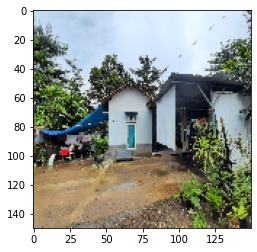

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')